In [1]:
import pandas as pd
data = pd.read_csv('DSFootballprojectdata.csv')
data

,Home_Team,Away_Team,Season,Round,Home_Score,Away_Score,Home_Win,Away_Win,Draw,Elo_Home,...,Home_Team_Loss_Number,Away_Team_Loss_Number,Home_Score_for_Number,Home_Score_against_Number,Away_Score_for_Number,Away_Score_against_Number,Home_Team_for_Average,Home_Team_against_Average,Away_Team_for_Average,Away_Team_against_Average
0,Saarbrücken,Stuttgarter Kickers,1990,1,1,0.0,1,0,0,56.0,...,-180.0,-186.0,267,-204.0,186.0,-281,1.570588,-1.200000,1.010870,-1.527174
1,SC Freiburg,Unterhaching,1990,1,2,3.0,0,1,0,53.0,...,-534.0,-248.0,890,-651.0,228.0,-398,1.633028,-1.194495,0.995633,-1.737991
2,VfL Osnabrück,Meppen,1990,1,1,1.0,0,0,1,52.0,...,-208.0,-157.0,267,-249.0,124.0,-251,1.517045,-1.414773,0.837838,-1.695946
3,RW Essen,Schalke 04,1990,1,0,0.0,0,0,1,53.0,...,-128.0,-492.0,151,-137.0,648.0,-813,1.398148,-1.268519,1.186813,-1.489011
4,Alemannia Aachen,MSV Duisburg,1990,1,1,2.0,0,1,0,57.0,...,-237.0,-483.0,400,-300.0,523.0,-731,1.666667,-1.250000,1.110403,-1.552017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146493,Lecce,SPAL,2021,33,1,2.0,0,1,0,0.0,...,-442.0,-131.0,538,-478.0,106.0,-161,1.315403,-1.168704,0.929825,-1.412281
146494,Frosinone,Cittadella,2021,33,1,1.0,0,0,1,0.0,...,-258.0,-292.0,326,-283.0,307.0,-390,1.347107,-1.169421,1.092527,-1.387900
146495,Reggina,Vicenza,2021,33,3,0.0,1,0,0,0.0,...,-369.0,-467.0,415,-341.0,404.0,-608,1.195965,-0.982709,0.922374,-1.388128
146496,Venezia,Nuova Cosenza,2021,33,3,0.0,1,0,0,0.0,...,-310.0,-61.0,391,-300.0,57.0,-72,1.273616,-0.977199,1.075472,-1.358491


In [2]:
data.fillna( method ='ffill', inplace = True)

In [3]:
X = data.drop(['Home_Win', 'Away_Win','Draw','Home_Team','Away_Team','Elo_Home','Elo_Away'], axis=1)

In [4]:
Y = data[['Home_Win','Away_Win','Draw']]

In [5]:
Y = Y.to_numpy()
Y

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       ...,
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_std = ss.fit_transform(X_train)
X_test_std = ss.transform(X_test)

In [44]:
from keras.models import Sequential
from keras.layers import Dense
from keras import models
from keras import layers
from tensorflow.keras import optimizers
from sklearn.metrics import roc_auc_score
import tensorflow as tf
def build_classifier():
    network = models.Sequential()
    network.add(layers.Dense(15, activation='relu', input_shape=(21,)))
    network.add(layers.Dense(10, activation='relu'))
    network.add(layers.Dense(3, activation='softmax'))
    #
    # Configure the network with optimizer, loss function and accuracy
    #
    network.compile(optimizer=optimizers.Adam(lr=0.01),
                    loss='categorical_crossentropy', metrics=[tf.keras.metrics.AUC()])
    return network

In [45]:
from keras.wrappers.scikit_learn import KerasClassifier
model = KerasClassifier(build_fn=build_classifier, epochs=20, batch_size=60)

/tmp/ipykernel_7356/3166071793.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=build_classifier, epochs=20, batch_size=60)


In [46]:
history = model.fit(X_train_std,Y_train, validation_data=(X_test, Y_test))

Epoch 1/20


/home/christopher/.local/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1710/1710 [==============================] - 6s 3ms/step - loss: 0.0269 - auc: 0.9998 - val_loss: 1374.8174 - val_auc: 0.4632
Epoch 2/20
1710/1710 [==============================] - 6s 3ms/step - loss: 1.5470e-05 - auc: 1.0000 - val_loss: 1163.7623 - val_auc: 0.4651
Epoch 3/20
1710/1710 [==============================] - 5s 3ms/step - loss: 3.3025e-06 - auc: 1.0000 - val_loss: 1124.8696 - val_auc: 0.4642
Epoch 4/20
1710/1710 [==============================] - 6s 3ms/step - loss: 1.2483e-06 - auc: 1.0000 - val_loss: 1104.1288 - val_auc: 0.4634
Epoch 5/20
1710/1710 [==============================] - 6s 3ms/step - loss: 5.2203e-07 - auc: 1.0000 - val_loss: 1059.9539 - val_auc: 0.4635
Epoch 6/20
1710/1710 [==============================] - 6s 3ms/step - loss: 2.1690e-07 - auc: 1.0000 - val_loss: 1055.1958 - val_auc: 0.4630
Epoch 7/20
1710/1710 [==============================] - 6s 3ms/step - loss: 8.7093e-08 - auc: 1.0000 - val_loss: 1042.7313 - val_auc: 0.4628
Epoch 8/20
1710/1710 [======

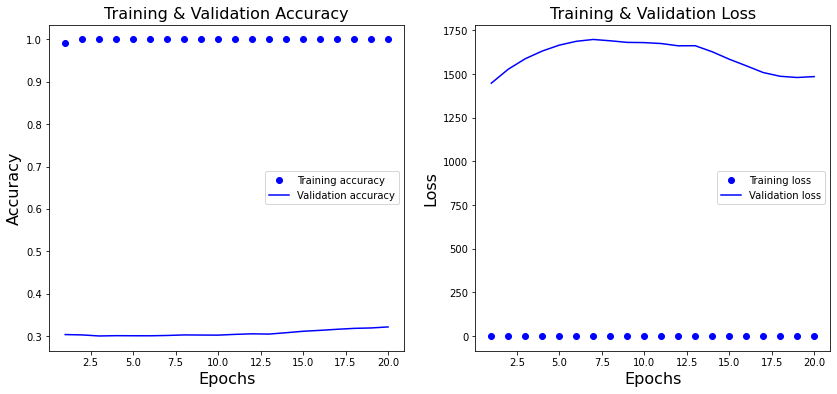

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
 
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
 
epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy vs Epochs
#
ax[0].plot(epochs, accuracy, 'bo', label='Training accuracy')
ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'bo', label='Training loss')
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

In [11]:
y_pred = model.predict(X_test_std)
y_pred

array([0, 2, 0, ..., 2, 1, 2])

In [12]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y_pred)
print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

[0 2 0 ... 2 1 2]
[[1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [14]:
from sklearn.metrics import multilabel_confusion_matrix
print(multilabel_confusion_matrix(Y_test, onehot_encoded))
from sklearn.metrics import classification_report
classes = {'0','1','2'}
print(classification_report(Y_test, onehot_encoded,target_names=classes))

[[[23665     0]
  [    0 20285]]

 [[32678     0]
  [    0 11272]]

 [[31557     2]
  [    0 12391]]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20285
           2       1.00      1.00      1.00     11272
           1       1.00      1.00      1.00     12391

   micro avg       1.00      1.00      1.00     43948
   macro avg       1.00      1.00      1.00     43948
weighted avg       1.00      1.00      1.00     43948
 samples avg       1.00      1.00      1.00     43948



/home/christopher/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ROC AUC score: 0.9999894377726375


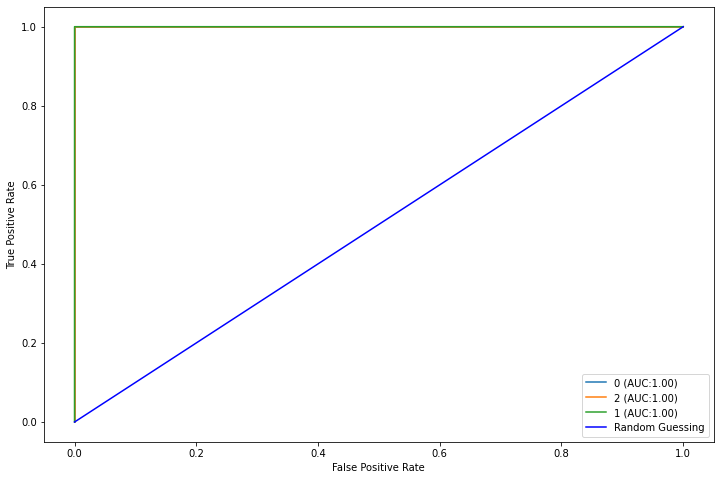

In [14]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score

classes = {'0','1','2'}

# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(Y_test, onehot_encoded, average="macro"):
    lb = LabelBinarizer()
    lb.fit(Y_test)
    Y_test = lb.transform(Y_test)

    for (idx, c_label) in enumerate(classes):
        fpr, tpr, thresholds = roc_curve(Y_test[:,idx].astype(int), onehot_encoded[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(Y_test, onehot_encoded, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(Y_test, onehot_encoded))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

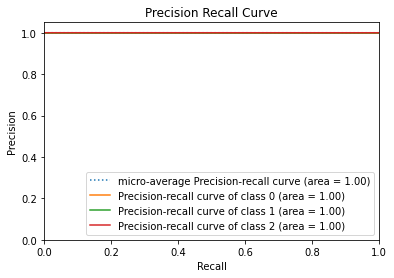

In [15]:
n_classes=3
# Compute Precision-Recall and plot curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i],
                                                        onehot_encoded[:, i])
    average_precision[i] = average_precision_score(Y_test[:, i], onehot_encoded[:, i])

# Compute micro-average ROC curve and ROC area
precision["micro"], recall["micro"], _ = precision_recall_curve(Y_test.ravel(),
    onehot_encoded.ravel())
average_precision["micro"] = average_precision_score(Y_test, onehot_encoded,
                                                     average="micro")


# Plot Precision-Recall curve for each class
plt.clf()
plt.plot(recall["micro"], precision["micro"],
         label='micro-average Precision-recall curve (area = {0:0.2f})'
               ''.format(average_precision["micro"]), linestyle=':')
for i in range(n_classes):
    plt.plot(recall[i], precision[i],
             label='Precision-recall curve of class {0} (area = {1:0.2f})'
                   ''.format(i, average_precision[i]))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.legend(loc="lower right")
plt.show()